# Modellen maken FoodBoost project

In het kader van het project 'FoodBoost'proberen we een model te vinden en zodanig te 'tunen'dat het kan voorspellen of iemand een recept lekker zal vinden aan de hand van de 7 favoriete recepten van die persoon, hiervoor hebben we gebruik gemaakt van de data van de 'allerhande' recepten van de Albert Heijn. Voordat we voorspelllingen zijn gaan doen op de volledige dataset hebben we een kleiner dataset gemaakt met alleen recepten die de tags 'Oost-Europees'en 'Jamie Oliver'bevatten om modellen te testen. Vervolgens hebben we dit uitgebreid naar een grotere dataset. de grotere dataset bevat vegetarische, lactosevrij en glutenvrije  recepten met de tags 'budget'en 'snel' om in te kunnen spelen op de doelgroep 'studenten met speciale dieet wensen' omdat de keuzemogelijkheden voor deze doelgroep vrij beperkt is. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from math import sqrt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, mean_squared_error,  mean_absolute_error, confusion_matrix,  classification_report, roc_curve
from sklearn.model_selection import  train_test_split, cross_val_score
from sklearn import svm
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


# FoodBoost met grote dataset

### 1) Inladen data

Ik bekijk de laatste kolom, oftewel de 'target' variabele, deze kan een 0 of 1 aangeven(Wel of niet lekker). Een willekeurige gebruiker geeft 6 favoriete recepten op, deze zijn allemaal of vegetarisch, of lactosevrij , of glutenvrij. Vervolgens geeft het model op basis van die 6 favoriete recepten een aanbeveling voor een 7e recept, als die overeenkomt met de dieetwens van de gebruiker, (in alle 6 gevallen) dan geeft het model 1(el lekker) aan, anders 0(niet lekker).

In [2]:
df = pd.read_csv('Uiteindelijk dataset food Groot.csv')

In [3]:
df = df.sample(frac=1).reset_index(drop=True)
df

,favo_Aziatische noedelsalade met tofu,favo_Aziatische roerbak met varkenssaté,favo_Champignonragout met groene asperges,favo_Chinese balletjes in zoetzure saus,favo_Eenpansnoedels met vega kip en wokgroente,"favo_Falafel-quinoaburger met zuivelspread, slamelange, rode biet en komkommer",favo_Gebakken gnocchi met spekjes en spruitjes,favo_Groenten in Thaise currysaus,favo_Hoisinnoedels met gehakt en groene groenten,favo_Kip roerbak met sperziebonen en rijst,...,voorspel_Spinazie-couscoussalade met ei,voorspel_Spinaziecurry met ei,voorspel_Supersnel rijstpannetje met tuinbonen,voorspel_Tomaten-tuinbonensalade,voorspel_Vegan curry met pitabroodjes,voorspel_Vegetarische wokschotel met bloemkoolrijst en sweet chilisaus,"voorspel_Volkorenpasta met kip, Chinese kool, gember en tahin",voorspel_Wokschotel met verse-kaasblokjes,voorspel_Zomerse chili con carne,target
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13995,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
13996,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
13997,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
13998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


### 2) model aanmaken en features (X) en target (y) bepalen

Ik ga gebruik maken van het model 'DecisionTree', omdat ik deze het meest geprobeerd en finegetuned heb. SVM en RandomForestClassifier zijn door andere groepsleden gedaan. 

In [4]:
model = DecisionTreeClassifier()
X=df.drop(df.columns[-1], axis=1)
y=df[df.columns[-1]]

In [5]:
y

0        0
1        1
2        1
3        0
4        0
        ..
13995    0
13996    1
13997    0
13998    0
13999    1
Name: target, Length: 14000, dtype: int64

In [6]:
X

,favo_Aziatische noedelsalade met tofu,favo_Aziatische roerbak met varkenssaté,favo_Champignonragout met groene asperges,favo_Chinese balletjes in zoetzure saus,favo_Eenpansnoedels met vega kip en wokgroente,"favo_Falafel-quinoaburger met zuivelspread, slamelange, rode biet en komkommer",favo_Gebakken gnocchi met spekjes en spruitjes,favo_Groenten in Thaise currysaus,favo_Hoisinnoedels met gehakt en groene groenten,favo_Kip roerbak met sperziebonen en rijst,...,voorspel_Spaghetti met worst en tomaat,voorspel_Spinazie-couscoussalade met ei,voorspel_Spinaziecurry met ei,voorspel_Supersnel rijstpannetje met tuinbonen,voorspel_Tomaten-tuinbonensalade,voorspel_Vegan curry met pitabroodjes,voorspel_Vegetarische wokschotel met bloemkoolrijst en sweet chilisaus,"voorspel_Volkorenpasta met kip, Chinese kool, gember en tahin",voorspel_Wokschotel met verse-kaasblokjes,voorspel_Zomerse chili con carne
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13995,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
13996,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13997,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 3) data verdelen in train_test_split

In [7]:
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size = 0.2)

In [8]:
train_X

,favo_Aziatische noedelsalade met tofu,favo_Aziatische roerbak met varkenssaté,favo_Champignonragout met groene asperges,favo_Chinese balletjes in zoetzure saus,favo_Eenpansnoedels met vega kip en wokgroente,"favo_Falafel-quinoaburger met zuivelspread, slamelange, rode biet en komkommer",favo_Gebakken gnocchi met spekjes en spruitjes,favo_Groenten in Thaise currysaus,favo_Hoisinnoedels met gehakt en groene groenten,favo_Kip roerbak met sperziebonen en rijst,...,voorspel_Spaghetti met worst en tomaat,voorspel_Spinazie-couscoussalade met ei,voorspel_Spinaziecurry met ei,voorspel_Supersnel rijstpannetje met tuinbonen,voorspel_Tomaten-tuinbonensalade,voorspel_Vegan curry met pitabroodjes,voorspel_Vegetarische wokschotel met bloemkoolrijst en sweet chilisaus,"voorspel_Volkorenpasta met kip, Chinese kool, gember en tahin",voorspel_Wokschotel met verse-kaasblokjes,voorspel_Zomerse chili con carne
9342,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
11368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2410,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8616,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7425,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4268,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13815,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
11058,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1791,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
train_y

9342     0
11368    0
2410     1
8616     1
7425     0
        ..
4268     0
13815    0
11058    1
1791     0
3745     0
Name: target, Length: 11200, dtype: int64

### 4) Model trainen (fitten)

In [10]:
model.fit(train_X, train_y)

DecisionTreeClassifier()

### 5) Waardes voorspellen van test_X

In [11]:
predictions = model.predict(test_X)
print("de voorspelde waardes", predictions)
print("de daadwerkelijke waardes", test_y)

de voorspelde waardes [1 0 0 ... 0 0 1]
de daadwerkelijke waardes 2262     1
13733    0
13179    0
2750     1
9271     1
        ..
4412     1
10931    0
829      0
9751     0
12455    1
Name: target, Length: 2800, dtype: int64


### 6) Uitkomst evalueren

In [12]:
matrix = confusion_matrix(test_y, predictions)
recall = recall_score(test_y, predictions)
precision = precision_score(test_y, predictions)
acc = accuracy_score(test_y, predictions)
print(matrix)
print('recall', recall)
print('precision', precision)
print('accuracy', acc)

[[1194  225]
 [ 275 1106]]
recall 0.8008689355539464
precision 0.830954169797145
accuracy 0.8214285714285714


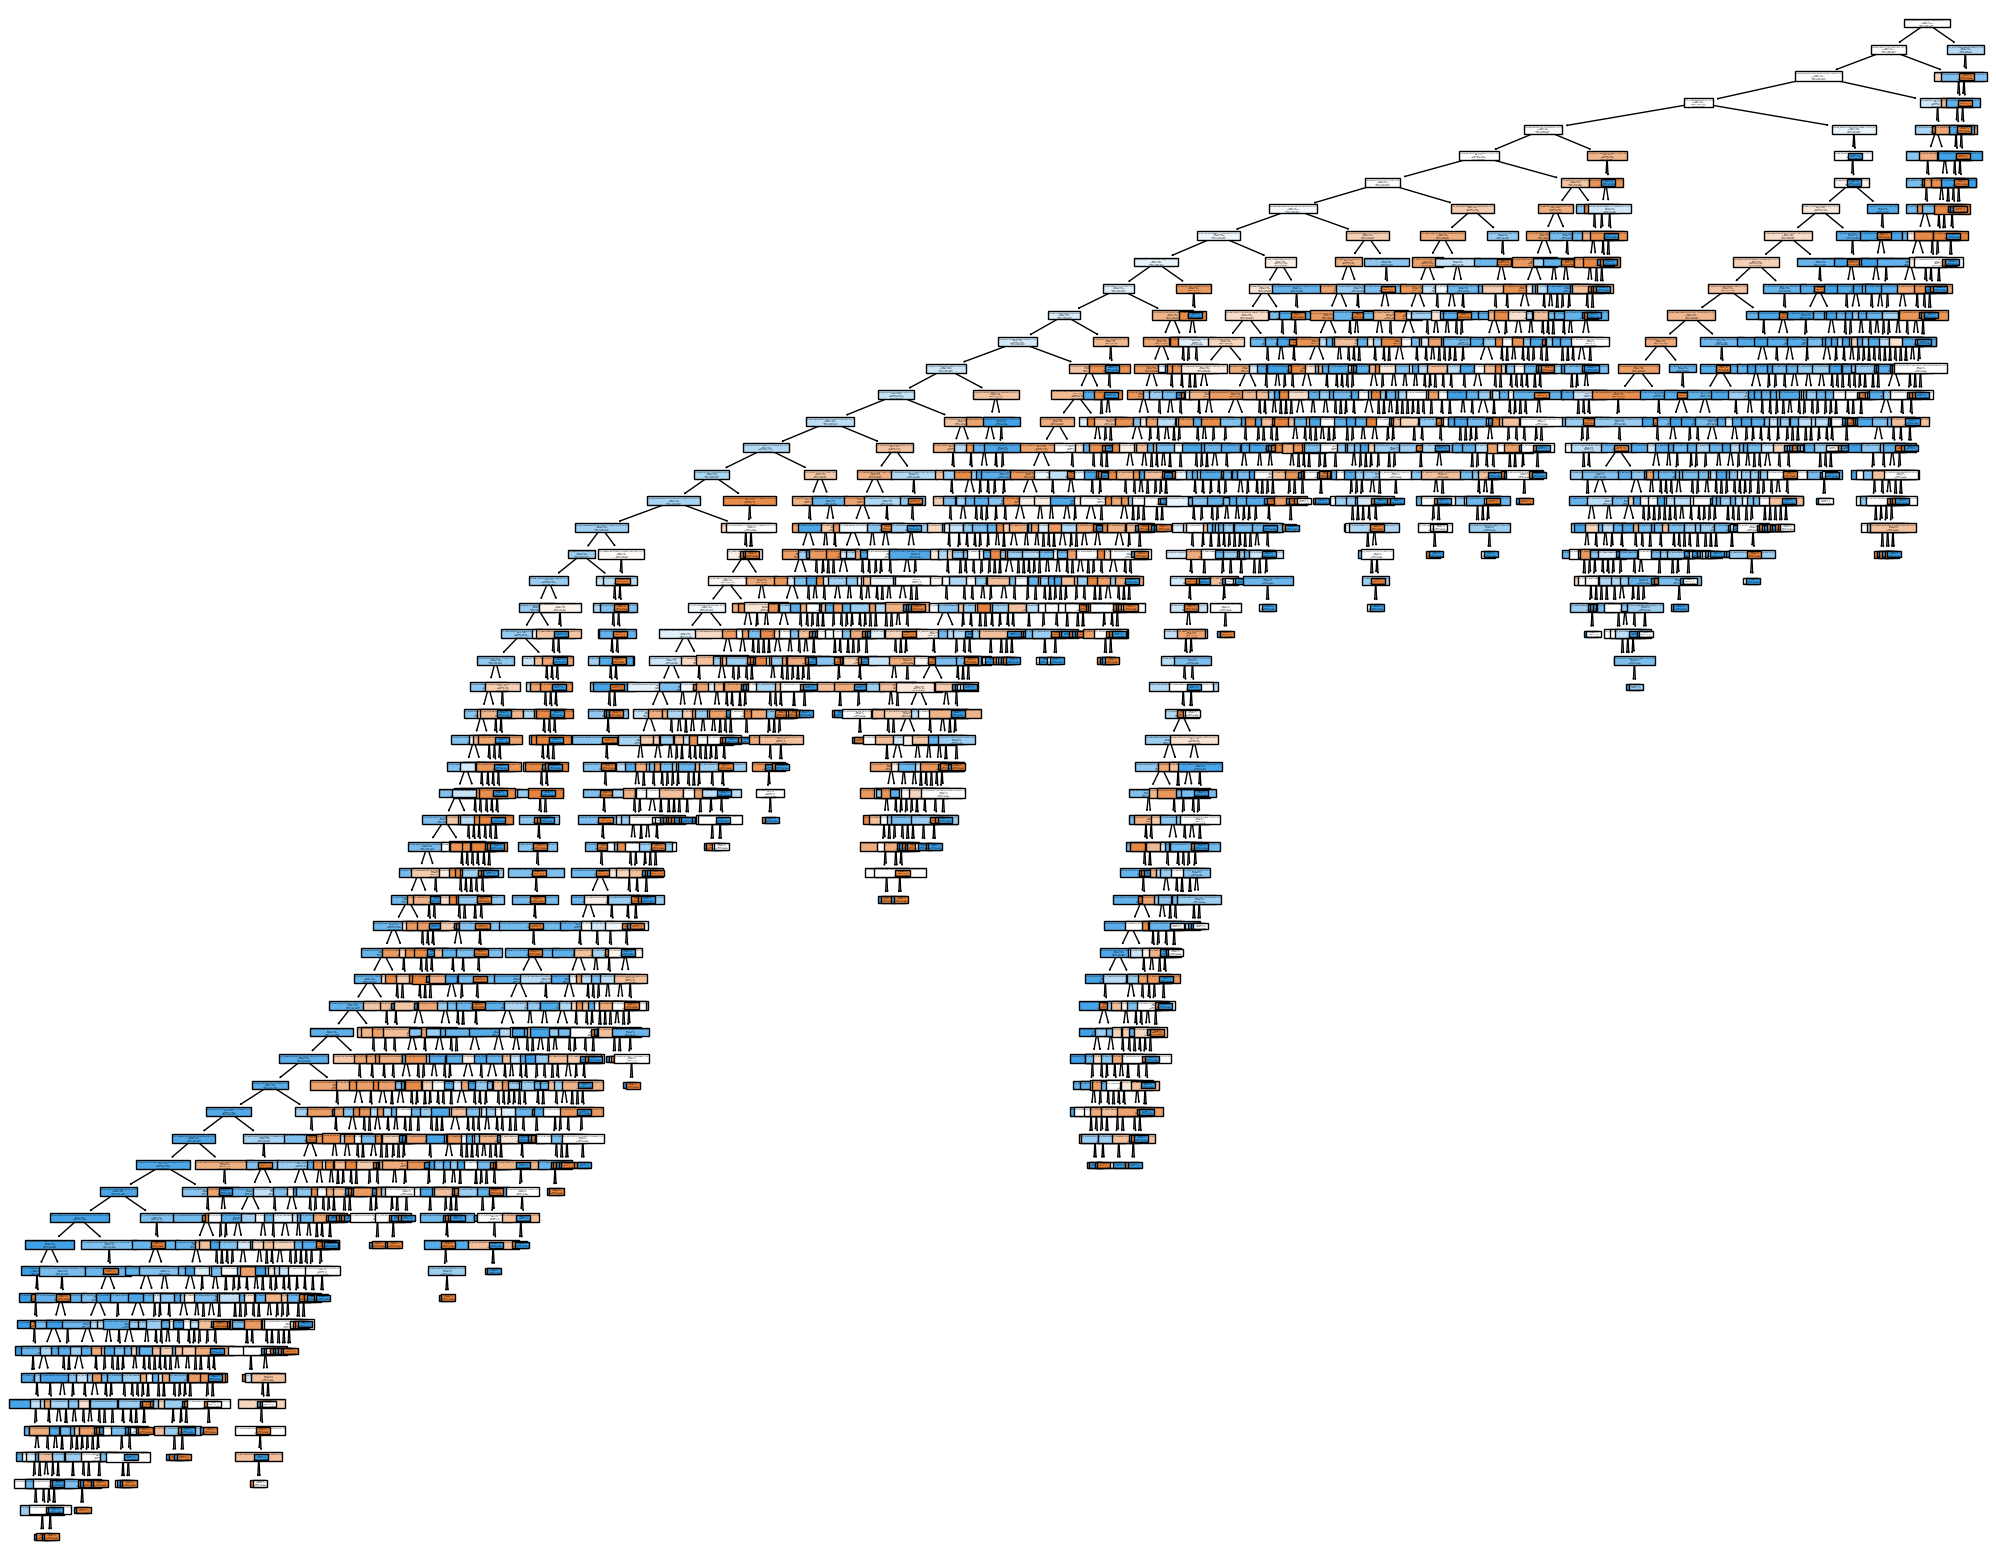

In [13]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model,
                   feature_names=X.columns,
                   class_names=['Niet lekker', "Wel lekker"],
                   filled=True)
plt.savefig('dt_jamie_europees.png')

### 7) Hyperparameters finetunen

In dit geval willen we het liefst een hoge precision score, dus gaan we de hyperparameters in stellen om voorkeur te geven aan de precision score. We willen graag dat als het model voorspelt dat gebruiker het eten lekker zal vinden, diegene het ook daadwerkelijk lekker vind. 

In [14]:
print('diepte dat is gebruikt', model.get_depth())
print()
print('aantal leafs dat is gebruikt', model.get_n_leaves())
print()
print('parameters dat is gebruikt', model.get_params())

diepte dat is gebruikt 57

aantal leafs dat is gebruikt 1754

parameters dat is gebruikt {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


In [15]:
from sklearn.model_selection import GridSearchCV

In [34]:
params = {'max_depth': [40,60, 80, 100, 120], 
          'min_samples_leaf': [1,2,20,80,200,500,1000,2000],
          'criterion': ['gini', 'entropy']}

In [35]:
grid_search = GridSearchCV(estimator=model, 
                           param_grid=params, 
                           cv=5, n_jobs=-1, verbose=1, scoring = "precision")


In [36]:
%%time
grid_search.fit(train_X, train_y)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
CPU times: user 696 ms, sys: 92 ms, total: 788 ms
Wall time: 1.4 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [40, 60, 80, 100, 120],
                         'min_samples_leaf': [1, 2, 20, 80, 200, 500, 1000,
                                              2000]},
             scoring='precision', verbose=1)

In [37]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=100)

In [38]:
model_best = grid_search.best_estimator_

In [44]:
model_best.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 100,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [39]:
predictions_best = model_best.predict(test_X)

###### Evaluatie origineel

In [40]:
matrix = confusion_matrix(test_y, predictions)
recall = recall_score(test_y, predictions)
precision = precision_score(test_y, predictions)
accuracy = accuracy_score(test_y, predictions)
print(matrix)
print('recall', recall)
print('precision', precision)
print('accuracy',accuracy)

[[1194  225]
 [ 275 1106]]
recall 0.8008689355539464
precision 0.830954169797145
accuracy 0.8214285714285714


###### Evaluatie na hyperparameters

In [41]:
matrix_hyper = confusion_matrix(test_y, predictions_best)
recall_hyper = recall_score(test_y, predictions_best)
precision_hyper = precision_score(test_y, predictions_best)
acc_hyper = accuracy_score(test_y, predictions_best)
print(matrix_hyper)
print('recall', recall_hyper)
print('precision', precision_hyper)
print('accuracy',acc_hyper)

[[1205  214]
 [ 256 1125]]
recall 0.8146270818247646
precision 0.8401792382374906
accuracy 0.8321428571428572


Precision = hoeveel van de aanbevolen gerechten gebruiker daadwerkelijk lekker vind (De kans dat een willekeurige gebruiker het aanbevolen recept lekker vind is 0,84 of 84%)
Recall = Hoeveel recepten die iemand lekker vind gevonden zijn(Van alle recepten dat iemand lekker vind is de kans 0,81 of 81% dat het model ze allemaal vind)
Accuracy = Hoe goed er in het algemeen is voorspeld(In 83% van de gevallen is het aanbevolen recept goed voorspeld, dus wel of niet lekker). 

### ROC-Curve

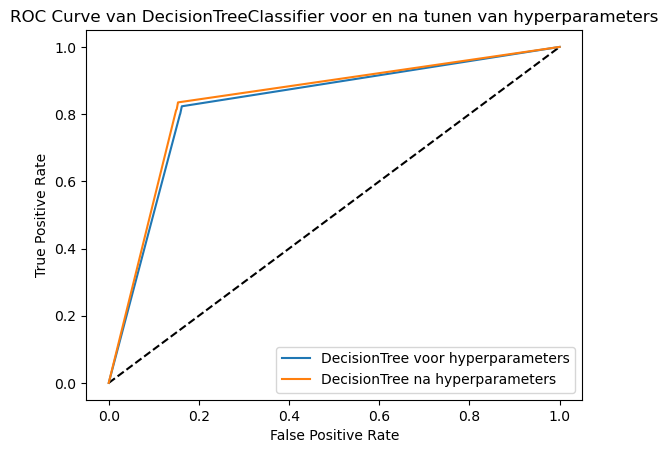

In [43]:
y_pred_prob_modeloud = model.predict_proba(test_X)[:,1]
fpr_oud, tpr_oud, thresholds_oud = roc_curve(test_y, y_pred_prob_modeloud)

y_pred_prob_modelnieuw = model_best.predict_proba(test_X)[:,1]
fpr_nieuw, tpr_nieuw, thresholds_nieuw = roc_curve(test_y, y_pred_prob_modelnieuw)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_oud, tpr_oud, label = 'DecisionTree voor hyperparameters')
plt.plot(fpr_nieuw, tpr_nieuw, label = 'DecisionTree na hyperparameters')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve van DecisionTreeClassifier voor en na tunen van hyperparameters')
plt.legend()
plt.show()